In [1]:
#import the library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor 
from sklearn.metrics import explained_variance_score, mean_absolute_error,r2_score, mean_squared_error

In [2]:
house_data = pd.read_csv('data/miami-housing.csv')

In [3]:
house_data.head()

,LATITUDE,LONGITUDE,PARCELNO,SALE_PRC,LND_SQFOOT,TOT_LVG_AREA,SPEC_FEAT_VAL,RAIL_DIST,OCEAN_DIST,WATER_DIST,CNTR_DIST,SUBCNTR_DI,HWY_DIST,age,avno60plus,month_sold,structure_quality
0,25.891031,-80.160561,622280070620,440000.0,9375,1753,0,2815.9,12811.4,347.6,42815.3,37742.2,15954.9,67,0,8,4
1,25.891324,-80.153968,622280100460,349000.0,9375,1715,0,4359.1,10648.4,337.8,43504.9,37340.5,18125.0,63,0,9,4
2,25.891334,-80.153740,622280100470,800000.0,9375,2276,49206,4412.9,10574.1,297.1,43530.4,37328.7,18200.5,61,0,2,4
3,25.891765,-80.152657,622280100530,988000.0,12450,2058,10033,4585.0,10156.5,0.0,43797.5,37423.2,18514.4,63,0,9,4
4,25.891825,-80.154639,622280100200,755000.0,12800,1684,16681,4063.4,10836.8,326.6,43599.7,37550.8,17903.4,42,0,7,4


In [4]:
house_data.shape

(13932, 17)

In [5]:
house_data.dtypes

LATITUDE             float64
LONGITUDE            float64
PARCELNO               int64
SALE_PRC             float64
LND_SQFOOT             int64
TOT_LVG_AREA           int64
SPEC_FEAT_VAL          int64
RAIL_DIST            float64
OCEAN_DIST           float64
WATER_DIST           float64
CNTR_DIST            float64
SUBCNTR_DI           float64
HWY_DIST             float64
age                    int64
avno60plus             int64
month_sold             int64
structure_quality      int64
dtype: object

In [6]:
#Display the summary of data
house_data.describe().T

,count,mean,std,min,25%,50%,75%,max
LATITUDE,13932.0,2.572881e+01,1.406333e-01,2.543433e+01,2.562006e+01,2.573181e+01,2.585227e+01,2.597438e+01
LONGITUDE,13932.0,-8.032748e+01,8.919907e-02,-8.054217e+01,-8.040328e+01,-8.033891e+01,-8.025802e+01,-8.011975e+01
PARCELNO,13932.0,2.356496e+12,1.199290e+12,1.020008e+11,1.079160e+12,3.040300e+12,3.060170e+12,3.660170e+12
SALE_PRC,13932.0,3.999419e+05,3.172147e+05,7.200000e+04,2.350000e+05,3.100000e+05,4.280000e+05,2.650000e+06
LND_SQFOOT,13932.0,8.620880e+03,6.070089e+03,1.248000e+03,5.400000e+03,7.500000e+03,9.126250e+03,5.706400e+04
TOT_LVG_AREA,13932.0,2.058045e+03,8.135385e+02,8.540000e+02,1.470000e+03,1.877500e+03,2.471000e+03,6.287000e+03
SPEC_FEAT_VAL,13932.0,9.562493e+03,1.389097e+04,0.000000e+00,8.100000e+02,2.765500e+03,1.235225e+04,1.750200e+05
RAIL_DIST,13932.0,8.348549e+03,6.178027e+03,1.050000e+01,3.299450e+03,7.106300e+03,1.210260e+04,2.962150e+04
OCEAN_DIST,13932.0,3.169099e+04,1.759508e+04,2.361000e+02,1.807935e+04,2.854175e+04,4.431065e+04,7.574490e+04
WATER_DIST,13932.0,1.196029e+04,1.193299e+04,0.000000e+00,2.675850e+03,6.922600e+03,1.920000e+04,5.039980e+04


In [7]:
#Check the missing value
house_data.isnull().sum()

LATITUDE             0
LONGITUDE            0
PARCELNO             0
SALE_PRC             0
LND_SQFOOT           0
TOT_LVG_AREA         0
SPEC_FEAT_VAL        0
RAIL_DIST            0
OCEAN_DIST           0
WATER_DIST           0
CNTR_DIST            0
SUBCNTR_DI           0
HWY_DIST             0
age                  0
avno60plus           0
month_sold           0
structure_quality    0
dtype: int64

In [8]:
house_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13932 entries, 0 to 13931
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   LATITUDE           13932 non-null  float64
 1   LONGITUDE          13932 non-null  float64
 2   PARCELNO           13932 non-null  int64  
 3   SALE_PRC           13932 non-null  float64
 4   LND_SQFOOT         13932 non-null  int64  
 5   TOT_LVG_AREA       13932 non-null  int64  
 6   SPEC_FEAT_VAL      13932 non-null  int64  
 7   RAIL_DIST          13932 non-null  float64
 8   OCEAN_DIST         13932 non-null  float64
 9   WATER_DIST         13932 non-null  float64
 10  CNTR_DIST          13932 non-null  float64
 11  SUBCNTR_DI         13932 non-null  float64
 12  HWY_DIST           13932 non-null  float64
 13  age                13932 non-null  int64  
 14  avno60plus         13932 non-null  int64  
 15  month_sold         13932 non-null  int64  
 16  structure_quality  139

In [9]:
#Detecting outliers and missing values

In [10]:
def numerical_column_summary( x ):
    
    # freq and missings
    n_total = x.shape[0]    # total records 
    n_miss = x.isna().sum()  # count of missing values
    perc_miss = n_miss * 100 / n_total  # % age of missing values
    
    # outliers - iqr
    q1 = x.quantile(0.25)
    q3 = x.quantile(0.75)
    iqr = q3 - q1
    lc_iqr = q1 - 1.5 * iqr
    uc_iqr = q3 + 1.5 * iqr
    
    return pd.Series( [ x.dtype, x.nunique(), n_total, x.count(), n_miss, perc_miss,
                       x.sum(), x.mean(), x.std(), x.var(), 
                       lc_iqr, uc_iqr, 
                       x.min(), x.quantile(0.01), x.quantile(0.05), x.quantile(0.10), 
                       x.quantile(0.25), x.quantile(0.5), x.quantile(0.75), 
                       x.quantile(0.90), x.quantile(0.95), x.quantile(0.99), x.max() ], 
                     
                    index = ['dtype', 'cardinality', 'n_tot', 'n', 'nmiss', 'perc_miss',
                             'sum', 'mean', 'std', 'var',
                        'lc_iqr', 'uc_iqr',
                        'min', 'p1', 'p5', 'p10', 'p25', 'p50', 'p75', 'p90', 'p95', 'p99', 'max']) 

In [11]:
summary1 = house_data.apply(numerical_column_summary) 

In [12]:
summary1

,LATITUDE,LONGITUDE,PARCELNO,SALE_PRC,LND_SQFOOT,TOT_LVG_AREA,SPEC_FEAT_VAL,RAIL_DIST,OCEAN_DIST,WATER_DIST,CNTR_DIST,SUBCNTR_DI,HWY_DIST,age,avno60plus,month_sold,structure_quality
dtype,float64,float64,int64,float64,int64,int64,int64,float64,float64,float64,float64,float64,float64,int64,int64,int64,int64
cardinality,13776,13776,13776,2111,4696,2978,7583,13235,13617,13218,13682,13642,13213,96,2,12,5
n_tot,13932,13932,13932,13932,13932,13932,13932,13932,13932,13932,13932,13932,13932,13932,13932,13932,13932
n,13932,13932,13932,13932,13932,13932,13932,13932,13932,13932,13932,13932,13932,13932,13932,13932,13932
nmiss,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
perc_miss,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
sum,358453.800963,-1119122.384947,32830701133048174,5571990993.0,120106099,28672677,133224659,116311980.7,441518925.6,166630693.9,954207237.6,572814838.5,107607573.3,427284,208,92729,48957
mean,25.728811,-80.327475,2356495918249.223145,399941.93174,8620.879917,2058.044574,9562.493468,8348.548715,31690.993798,11960.285235,68490.327132,41115.047265,7723.770693,30.669251,0.01493,6.655828,3.513997
std,0.140633,0.089199,1199290453568.09668,317214.683816,6070.088742,813.538535,13890.967782,6178.027333,17595.079468,11932.992369,32008.474808,22161.825935,6068.936108,21.153068,0.121276,3.301523,1.097444
var,0.019778,0.007956,1438297592019571280183296.0,100625155628.59465,36845977.334441,661844.948053,192958985.91532,38168021.72597,309586821.478997,142396306.887139,1024542459.535879,491146528.772394,36831985.48575,447.452294,0.014708,10.900057,1.204384


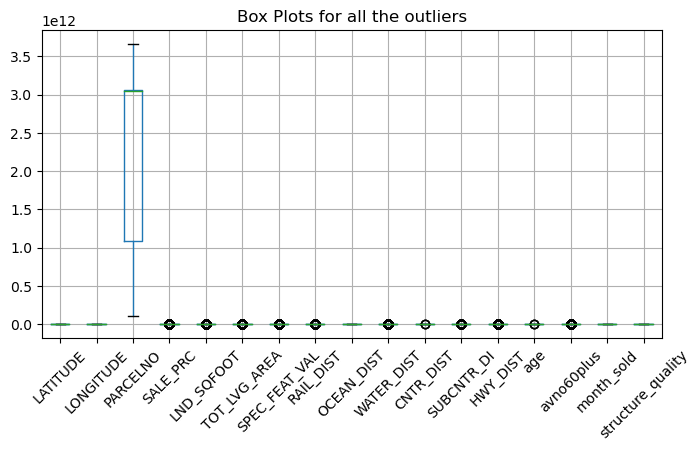

In [13]:
#Checking the outliers
plt.figure(figsize=(8, 4))
house_data.boxplot()
plt.title("Box Plots for all the outliers")
plt.xticks(rotation=45)
plt.show()

In [14]:
#Treatment of outliers

In [15]:
house_data = house_data.apply(lambda x : x.clip(lower = x.quantile(0.01) , 
                                        upper = x.quantile(0.99) ) )

In [16]:
summary2 = house_data.apply(numerical_column_summary) 

In [17]:
summary2

,LATITUDE,LONGITUDE,PARCELNO,SALE_PRC,LND_SQFOOT,TOT_LVG_AREA,SPEC_FEAT_VAL,RAIL_DIST,OCEAN_DIST,WATER_DIST,CNTR_DIST,SUBCNTR_DI,HWY_DIST,age,avno60plus,month_sold,structure_quality
dtype,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,int64,int64,int64,int64
cardinality,13501,13500,13503,1997,4559,2800,7448,12983,13339,13054,13408,13369,12951,80,2,12,5
n_tot,13932,13932,13932,13932,13932,13932,13932,13932,13932,13932,13932,13932,13932,13932,13932,13932,13932
n,13932,13932,13932,13932,13932,13932,13932,13932,13932,13932,13932,13932,13932,13932,13932,13932,13932
nmiss,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
perc_miss,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
sum,358454.291519,-1119121.050762,32830760987973012.0,5522930653.0,119258494.2,28608482.4,131565055.8,116141053.88,441378586.12,166441283.2,953703355.78,572238936.58,107093355.4,426278,208,92729,48957
mean,25.728847,-80.327379,2356500214468.347168,396420.517729,8560.041214,2053.436865,9443.371792,8336.280066,31680.920623,11946.689865,68454.159904,41073.710636,7686.86157,30.597043,0.01493,6.655828,3.513997
std,0.140417,0.088792,1199280781462.807861,296773.102186,5663.795131,793.319183,13359.372943,6137.792455,17547.15054,11892.791454,31808.36698,22002.265191,5932.715334,20.969379,0.121276,3.301523,1.097444
var,0.019717,0.007884,1438274392786042907262976.0,88074274180.879852,32078575.285708,629355.325651,178472845.422,37672496.220694,307902492.077019,141438488.572239,1011772209.945318,484099673.527613,35197111.23465,439.714866,0.014708,10.900057,1.204384


In [18]:
correlation = house_data.corr() 
correlation

,LATITUDE,LONGITUDE,PARCELNO,SALE_PRC,LND_SQFOOT,TOT_LVG_AREA,SPEC_FEAT_VAL,RAIL_DIST,OCEAN_DIST,WATER_DIST,CNTR_DIST,SUBCNTR_DI,HWY_DIST,age,avno60plus,month_sold,structure_quality
LATITUDE,1.000000,0.720976,-0.166253,0.048339,-0.074014,-0.197321,-0.005894,-0.176622,0.243149,-0.424391,-0.717625,-0.191721,-0.110401,0.419498,0.081461,-0.023728,0.391592
LONGITUDE,0.720976,1.000000,-0.433620,0.192960,0.036119,-0.186822,-0.007619,-0.307136,-0.456555,-0.766889,-0.791588,-0.375838,-0.209449,0.490254,0.059555,-0.011025,0.131711
PARCELNO,-0.166253,-0.433620,1.000000,-0.202100,0.071676,0.106355,0.055232,0.223712,0.289171,0.296280,0.421429,0.245485,0.015346,-0.268253,-0.160927,0.011132,0.044644
SALE_PRC,0.048339,0.192960,-0.202100,1.000000,0.389755,0.673797,0.504686,-0.084096,-0.275738,-0.126608,-0.277213,-0.383201,0.242816,-0.125317,-0.027410,0.000015,0.396474
LND_SQFOOT,-0.074014,0.036119,0.071676,0.389755,1.000000,0.441503,0.396438,-0.091029,-0.179106,-0.063616,-0.036494,-0.178856,0.097775,0.109818,-0.005000,0.006046,-0.002688
TOT_LVG_AREA,-0.197321,-0.186822,0.106355,0.673797,0.441503,1.000000,0.499354,0.078478,-0.046743,0.153530,0.143606,-0.039686,0.233045,-0.347362,-0.057018,0.003069,0.172234
SPEC_FEAT_VAL,-0.005894,-0.007619,0.055232,0.504686,0.396438,0.499354,1.000000,-0.023195,-0.057313,0.014532,-0.051130,-0.155694,0.156050,-0.094624,-0.008355,-0.014817,0.190606
RAIL_DIST,-0.176622,-0.307136,0.223712,-0.084096,-0.091029,0.078478,-0.023195,1.000000,0.255918,0.166307,0.449369,0.489010,-0.096270,-0.235080,-0.117407,0.011108,-0.075308
OCEAN_DIST,0.243149,-0.456555,0.289171,-0.275738,-0.179106,-0.046743,-0.057313,0.255918,1.000000,0.492380,0.243813,0.425343,0.088134,-0.158025,0.035382,-0.012755,0.209651
WATER_DIST,-0.424391,-0.766889,0.296280,-0.126608,-0.063616,0.153530,0.014532,0.166307,0.492380,1.000000,0.529056,0.194905,0.398958,-0.331418,-0.096523,0.010502,-0.034209


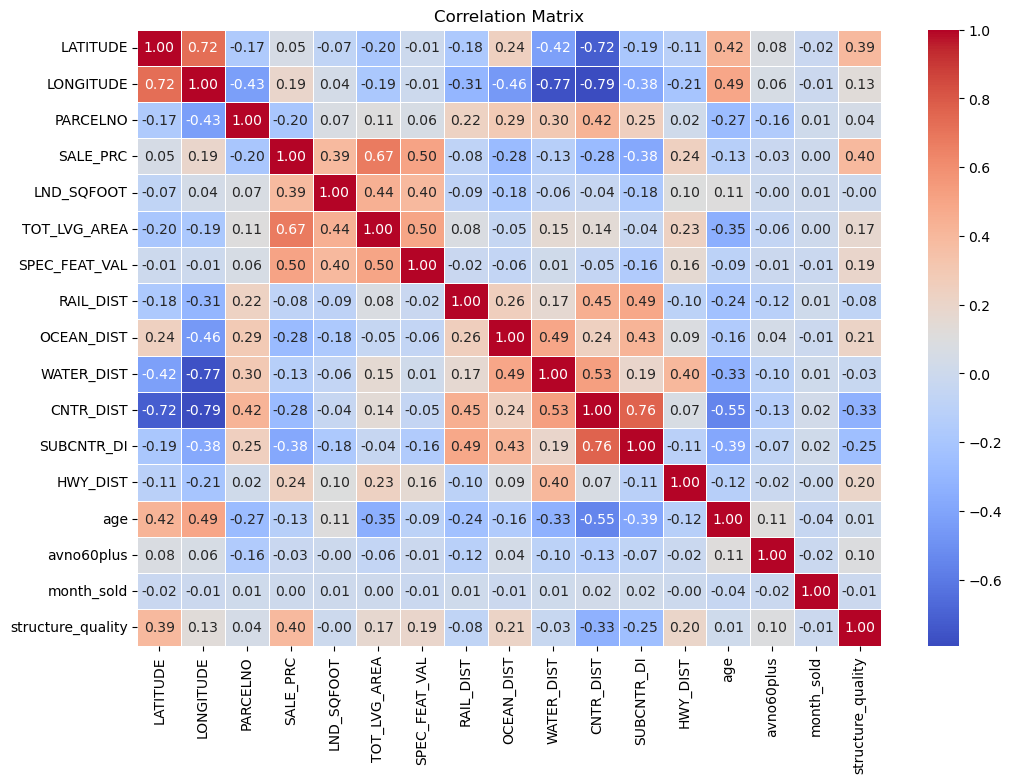

In [19]:
df = pd.DataFrame(house_data)

# Calculate the correlation matrix
corr_matrix = df.corr()

# Plot the correlation matrix using Seaborn
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix')
plt.show()

In [20]:
x = house_data.drop('SALE_PRC', axis=1)
y = house_data['SALE_PRC']

In [21]:
x


,LATITUDE,LONGITUDE,PARCELNO,LND_SQFOOT,TOT_LVG_AREA,SPEC_FEAT_VAL,RAIL_DIST,OCEAN_DIST,WATER_DIST,CNTR_DIST,SUBCNTR_DI,HWY_DIST,age,avno60plus,month_sold,structure_quality
0,25.891031,-80.160561,6.222801e+11,9375.0,1753.0,0.0,2815.9,12811.4,347.600,42815.3,37742.2,15954.9,67,0,8,4
1,25.891324,-80.153968,6.222801e+11,9375.0,1715.0,0.0,4359.1,10648.4,337.800,43504.9,37340.5,18125.0,63,0,9,4
2,25.891334,-80.153740,6.222801e+11,9375.0,2276.0,49206.0,4412.9,10574.1,297.100,43530.4,37328.7,18200.5,61,0,2,4
3,25.891765,-80.152657,6.222801e+11,12450.0,2058.0,10033.0,4585.0,10156.5,7.431,43797.5,37423.2,18514.4,63,0,9,4
4,25.891825,-80.154639,6.222801e+11,12800.0,1684.0,16681.0,4063.4,10836.8,326.600,43599.7,37550.8,17903.4,42,0,7,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13927,25.783130,-80.259795,1.313200e+11,6780.0,967.0,6580.0,3844.5,20568.0,3252.400,22175.9,12150.1,917.4,16,0,4,4
13928,25.783585,-80.260354,1.313200e+11,7500.0,1854.0,2544.0,3593.6,20791.9,3077.700,22375.1,12316.8,738.2,26,0,5,4
13929,25.783793,-80.256126,1.313200e+11,8460.0,1271.0,2064.0,4143.2,20307.9,3588.400,20966.9,12433.0,743.7,16,0,7,4
13930,25.784007,-80.257542,1.313200e+11,7500.0,1613.0,3136.0,3986.9,20542.6,3589.100,21475.6,12458.0,626.1,16,0,8,4


In [22]:
y

0        440000.0
1        349000.0
2        800000.0
3        988000.0
4        755000.0
           ...   
13927    275000.0
13928    340000.0
13929    287500.0
13930    315000.0
13931    250000.0
Name: SALE_PRC, Length: 13932, dtype: float64

In [23]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=14)

In [24]:
x_train

,LATITUDE,LONGITUDE,PARCELNO,LND_SQFOOT,TOT_LVG_AREA,SPEC_FEAT_VAL,RAIL_DIST,OCEAN_DIST,WATER_DIST,CNTR_DIST,SUBCNTR_DI,HWY_DIST,age,avno60plus,month_sold,structure_quality
2419,25.800428,-80.228573,1.312704e+11,7150.0,978.0,0.0,865.3,20737.1,3217.0,14568.400,14568.4,4180.6,71,0,9,2
8822,25.557342,-80.369101,3.060180e+12,7100.0,2594.0,5030.0,5397.1,15904.4,3048.6,98597.400,51005.3,2070.2,0,0,1,4
1855,25.872882,-80.176835,1.122320e+12,10400.0,1766.0,1900.0,553.4,18611.5,344.7,35307.000,33507.1,10345.7,26,0,1,4
1017,25.918940,-80.267003,3.421170e+12,6420.0,955.0,3680.0,8229.6,47824.1,1295.9,57151.000,57151.0,2347.5,59,0,11,4
5592,25.644905,-80.380844,3.050180e+12,4895.0,1641.0,4588.0,2317.1,26897.2,20707.9,78262.400,27225.3,1389.7,31,0,9,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6471,25.753805,-80.336151,3.040090e+12,7050.0,1768.0,2939.0,8034.2,32101.2,3137.8,47895.200,24864.0,5228.8,54,0,8,4
2454,25.808627,-80.202757,1.312502e+11,7150.0,1044.0,277.0,3544.0,21886.4,5494.6,12231.426,12003.2,973.1,77,0,9,1
9484,25.507301,-80.405415,3.069350e+12,5000.0,1656.0,2767.0,24341.9,21689.4,15198.5,120350.100,72426.4,2328.7,25,0,9,2
13656,25.606259,-80.436769,3.059330e+12,7200.0,2061.0,3456.0,3030.0,42103.6,24204.7,101419.800,50377.8,19331.7,18,0,8,4


In [25]:
y_train

2419      150000.0
8822      321700.0
1855      485000.0
1017      165000.0
5592      245000.0
           ...    
6471      305000.0
2454      220000.0
9484      195000.0
13656     320000.0
2667     1250000.0
Name: SALE_PRC, Length: 9752, dtype: float64

In [26]:
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [27]:
x_train

array([[ 0.51025907,  1.11259477, -1.83613599, ..., -0.12112262,
         0.70764001, -1.36825332],
       [-1.22310266, -0.46975488,  0.59009163, ..., -0.12112262,
        -1.72429   ,  0.44826106],
       [ 1.0269116 ,  1.69516398, -1.0151778 , ..., -0.12112262,
        -1.72429   ,  0.44826106],
       ...,
       [-1.5799301 , -0.87865367,  0.59768766, ..., -0.12112262,
         0.70764001, -1.36825332],
       [-0.87429735, -1.2317005 ,  0.5893874 , ..., -0.12112262,
         0.40364876,  0.44826106],
       [ 0.37450533,  1.82913328, -1.74436923, ..., -0.12112262,
         1.31562252,  1.35651825]])

In [28]:
x_test

array([[-0.41189187, -1.50788878,  0.58915537, ..., -0.12112262,
         1.31562252,  0.44826106],
       [ 0.98786838,  0.56574161, -1.59587505, ..., -0.12112262,
         1.01163126,  0.44826106],
       [-0.30149446, -1.38919041,  0.58109543, ..., -0.12112262,
        -0.20433374,  0.44826106],
       ...,
       [ 1.54427917,  1.60213145, -1.34674227, ..., -0.12112262,
        -0.20433374,  1.35651825],
       [ 1.18961381,  1.27997312, -1.43024205, ..., -0.12112262,
         1.01163126, -1.36825332],
       [ 1.0666916 ,  1.67917753, -0.5181629 , ..., -0.12112262,
         0.40364876,  0.44826106]])

### model 1

In [29]:
regresor = LinearRegression()
regresor.fit(x_train, y_train)

LinearRegression()

In [30]:
intercept = regresor.intercept_
intercept

399071.5014356136

In [31]:
coefficent = regresor.coef_
coefficent

array([-6.32966343e+04,  1.33062674e+05, -5.65880461e+04,  2.50567955e+04,
        1.44347511e+05,  4.08647899e+04,  3.07673296e+04,  2.94846181e+04,
       -1.20887319e+04,  4.55236115e+04, -1.02179770e+05,  2.20967947e+04,
       -4.21509917e+04, -1.51955829e+04,  4.28600051e+01,  7.83571843e+04])

In [32]:
# Fit the multiple linear regression model
model = sm.OLS(y, x).fit()
# Print the summary to see p-values and other statistics
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:               SALE_PRC   R-squared:                       0.736
Model:                            OLS   Adj. R-squared:                  0.735
Method:                 Least Squares   F-statistic:                     2583.
Date:                Sat, 25 Nov 2023   Prob (F-statistic):               0.00
Time:                        16:08:35   Log-Likelihood:            -1.8605e+05
No. Observations:               13932   AIC:                         3.721e+05
Df Residuals:                   13916   BIC:                         3.723e+05
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
LATITUDE           9.113e+04    2.8e+0

In [33]:
y_pred = regresor.predict(x_test)

In [34]:
explained_variance = explained_variance_score(y_test, y_pred)
print(f'Explained Variance Score: {explained_variance}')
mae = mean_absolute_error(y_test, y_pred)
print(f'Mean Absolute Error: {mae}')
r2 = r2_score(y_test, y_pred)
print(f'R-squared Score: {r2}')
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f'RMSE: {rmse}')

Explained Variance Score: 0.7324287438961592
Mean Absolute Error: 101877.32804572985
R-squared Score: 0.7323598924238149
Mean Squared Error: 21815636646.261566
RMSE: 147701.1734762509


### Model-2

In [35]:
knnregresor = KNeighborsRegressor()
knnregresor.fit(x_train, y_train)

KNeighborsRegressor()

In [37]:
y_prediction = knnregresor.predict(x_test)

In [38]:
explained_variance = explained_variance_score(y_test, y_prediction)
print(f'Explained Variance Score: {explained_variance}')
mae = mean_absolute_error(y_test, y_prediction)
print(f'Mean Absolute Error: {mae}')
r2 = r2_score(y_test, y_prediction)
print(f'R-squared Score: {r2}')
mse = mean_squared_error(y_test, y_prediction)
print(f'Mean Squared Error: {mse}')
rmse = np.sqrt(mean_squared_error(y_test, y_prediction))
print(f'RMSE: {rmse}')

Explained Variance Score: 0.8847580268151718
Mean Absolute Error: 50243.216507177036
R-squared Score: 0.8845796367883885
Mean Squared Error: 9408039505.765408
RMSE: 96995.04887243167
